In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import Ko

In [2]:
raw_per = pd.read_csv('../Data/ALL/Annual/ALL_PER_IRFS_SEPERATED.csv', encoding = 'cp949', header = 7, dtype = 'str')
raw_rt = pd.read_csv('../Data/ALL/Annual/ALL_SILH_SUIK_RT_ANNUAL_NO_DIVIDEND.csv', encoding = 'cp949', header = 7, dtype = 'str')

In [3]:
raw_per.head(7)

,Term,19900101,20180930,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 5010,Unnamed: 5011,Unnamed: 5012,Unnamed: 5013,Unnamed: 5014,Unnamed: 5015,Unnamed: 5016,Unnamed: 5017,Unnamed: 5018,Unnamed: 5019
0,Symbol,A000010,A000011,A000012,A000020,A000021,A000022,A000023,A000030,A000031,...,A900310,A950010,A950030,A950070,A950100,A950110,A950130,A950140,A950160,A950170
1,Symbol Name,조흥은행,조흥은행(1신),조흥은행(2신),동화약품,동화약품공업(1신),동화약품(전환1신),동화약품(전환2신),우리은행,한빛은행(1신),...,컬러레이,평산차업 KDR,네프로아이티,중국고섬,SBI모기지,SBI핀테크솔루션즈,엑세스바이오,잉글우드랩,코오롱티슈진(Reg.S),JTC
2,Kind,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,...,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC,SSC
3,Item,S420006002,S420006002,S420006002,S420006002,S420006002,S420006002,S420006002,S420006002,S420006002,...,S420006002,S420006002,S420006002,S420006002,S420006002,S420006002,S420006002,S420006002,S420006002,S420006002
4,Item Name,PER(IFRS-연결),PER(IFRS-연결),PER(IFRS-연결),PER(IFRS-연결),PER(IFRS-연결),PER(IFRS-연결),PER(IFRS-연결),PER(IFRS-연결),PER(IFRS-연결),...,PER(IFRS-연결),PER(IFRS-연결),PER(IFRS-연결),PER(IFRS-연결),PER(IFRS-연결),PER(IFRS-연결),PER(IFRS-연결),PER(IFRS-연결),PER(IFRS-연결),PER(IFRS-연결)
5,Frequency,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,...,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY,DAILY
6,1990-12-31,NaN,NaN,NaN,1.67,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 성과지표 데이터프레임 전처리 수행

In [4]:
per_df = Ko.Preprocessing(raw_per, column = '심볼', drop_limit=2)

In [5]:
from collections import Counter

# 수익률 DF 전처리

In [6]:
rt_df = Ko.Preprocessing(raw_rt, column = '심볼', drop_limit=2).apply(lambda x: Ko.rt_transform(x))

rt_df = rt_df.loc[per_df.index]
rt_df = rt_df.iloc[:, :-1]

In [7]:
rt_df.head()

,19901231,19911231,19921231,19931231,19941231,19951231,19961231,19971231,19981231,19991231,...,20081231,20091231,20101231,20111231,20121231,20131231,20141231,20151231,20161231,20171231
A000010,0.8188,0.8689,0.9717,1.0400,1.2105,0.7921,0.7560,0.5406,0.3468,0.6840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A000020,0.8185,0.8322,1.4148,1.2452,2.2504,0.5620,0.9526,0.2715,2.5781,1.0949,...,0.5765,1.2265,0.6979,0.7713,1.4804,0.7268,1.2688,1.4614,0.9975,1.2007
A000030,0.8000,0.8833,0.9528,0.8731,0.9847,0.9810,0.7216,0.5345,0.2705,0.5818,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6494,0.8820,1.4456,1.2353
A000040,0.7571,0.5425,1.7913,1.1683,0.9068,0.7944,1.4471,0.0967,0.6666,0.6218,...,0.3075,1.8986,1.2052,0.9852,0.7423,0.8869,2.3627,1.2274,0.6792,0.3767
A000050,1.0082,1.0183,1.0489,1.1787,1.2502,0.7268,1.1234,0.3794,1.0925,1.3153,...,0.3128,2.1068,0.9378,0.7784,1.1437,1.3364,1.6697,1.0577,0.7948,0.9085


# 포트폴리오 구성 수행

In [8]:
data = Ko.portfolio_selection(per_df)

In [21]:
data.head(10)

,19901231,19911231,19921231,19931231,19941231,19951231,19961231,19971231,19981231,19991231,...,20081231,20091231,20101231,20111231,20121231,20131231,20141231,20151231,20161231,20171231
A000010,x,x,x,x,x,x,x,x,x,x,...,x,x,x,x,x,x,x,x,x,x
A000020,x,2,1,1,1,3,2,5,3,4,...,8,5,2,6,5,4,9,9,8,7
A000030,x,x,x,x,x,x,x,x,x,x,...,4,7,4,5,6,5,4,x,0,1
A000040,x,8,8,7,8,x,x,x,x,x,...,x,0,x,x,x,8,x,x,x,x
A000050,x,6,6,7,8,7,x,x,x,x,...,x,0,x,x,5,x,x,7,7,6
A000060,x,2,2,2,3,x,x,3,1,2,...,8,4,x,4,5,3,3,2,3,2
A000070,x,5,2,4,4,6,7,x,x,x,...,7,9,x,3,3,0,0,x,9,5
A000080,x,8,8,9,x,x,x,x,x,x,...,x,x,4,5,8,7,5,6,8,6
A000100,x,6,5,5,5,7,7,7,7,8,...,7,8,5,6,5,7,7,6,7,4
A000110,x,x,x,x,x,x,x,x,x,x,...,x,x,x,x,x,x,x,x,x,x


In [10]:
#data.to_csv('PER.csv')

# 포트폴리오 성과분석

In [11]:
result = Ko.performance_analysis(data, rt_df)
result.index = pd.to_datetime(data.columns, format = '%Y%m%d')

In [12]:
result.min()

GROUP_0    0.522666
GROUP_1    0.619569
GROUP_2    0.567441
GROUP_3    0.617536
GROUP_4    0.579675
GROUP_5    0.544318
GROUP_6    0.532644
GROUP_7    0.528911
GROUP_8    0.489082
GROUP_9    0.343441
dtype: float64

In [13]:
result.max()

GROUP_0    5.041613
GROUP_1    2.659205
GROUP_2    2.625095
GROUP_3    4.924588
GROUP_4    2.047357
GROUP_5    2.461826
GROUP_6    1.994465
GROUP_7    2.181621
GROUP_8    2.452848
GROUP_9    3.688193
dtype: float64

# 1990년대

In [14]:
result.head(10)

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
1990-12-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1991-12-31,1.038900,0.931558,0.847786,0.887546,0.845671,0.887769,0.815283,0.776037,0.686560,0.725840
1992-12-31,1.462264,1.398151,1.366825,1.354994,1.339149,1.273421,1.157597,1.245306,1.333963,1.257136
1993-12-31,1.548626,1.579524,1.648641,1.386152,1.589279,1.304629,1.332855,1.479665,1.273374,1.336262
1994-12-31,1.351344,1.465700,1.458137,1.328981,1.530434,1.533863,1.255929,1.274450,1.247950,1.382075
1995-12-31,0.754149,0.729059,0.757874,0.791253,0.769317,0.731771,0.810571,0.754938,0.671229,0.690357
1996-12-31,1.467026,1.155589,1.104039,1.190711,0.905186,0.909858,0.997805,0.919508,0.887014,0.905808
1997-12-31,0.981160,0.747791,0.733241,0.677674,0.664376,0.951454,0.532644,0.528911,0.489082,0.363826
1998-12-31,1.372998,1.542856,1.369820,1.155913,1.624539,1.350936,1.631487,1.250693,1.280593,1.199659
1999-12-31,5.041613,2.659205,2.625095,4.924588,1.839607,2.461826,1.754219,1.597750,2.212837,3.688193


Text(0.5,1,'Performance result by PER Group')

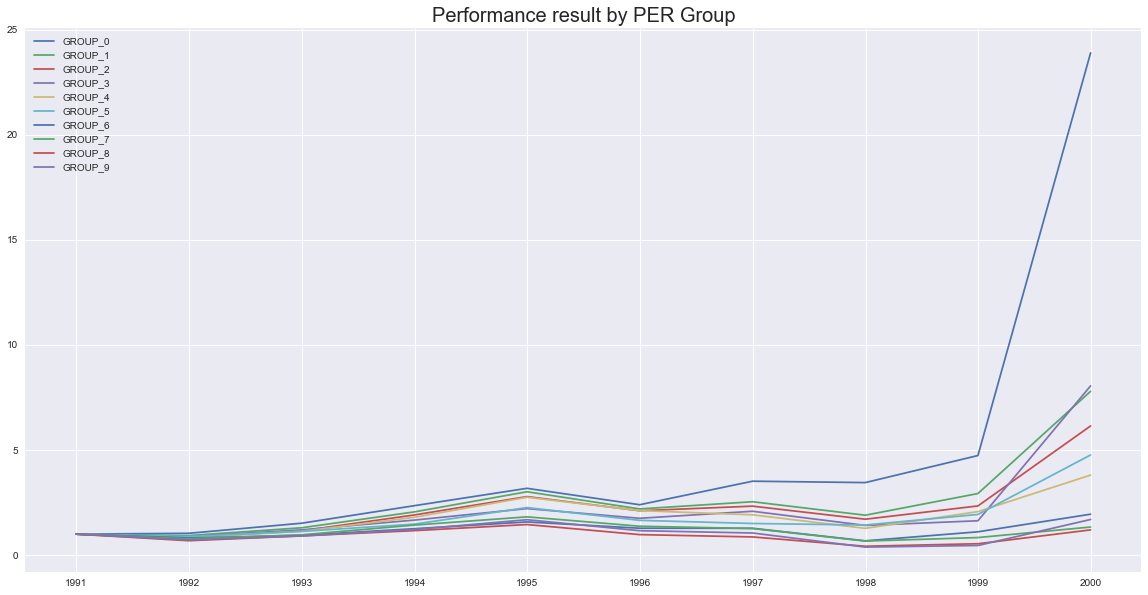

In [15]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[:10].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2000 년대

Text(0.5,1,'Performance result by PER Group')

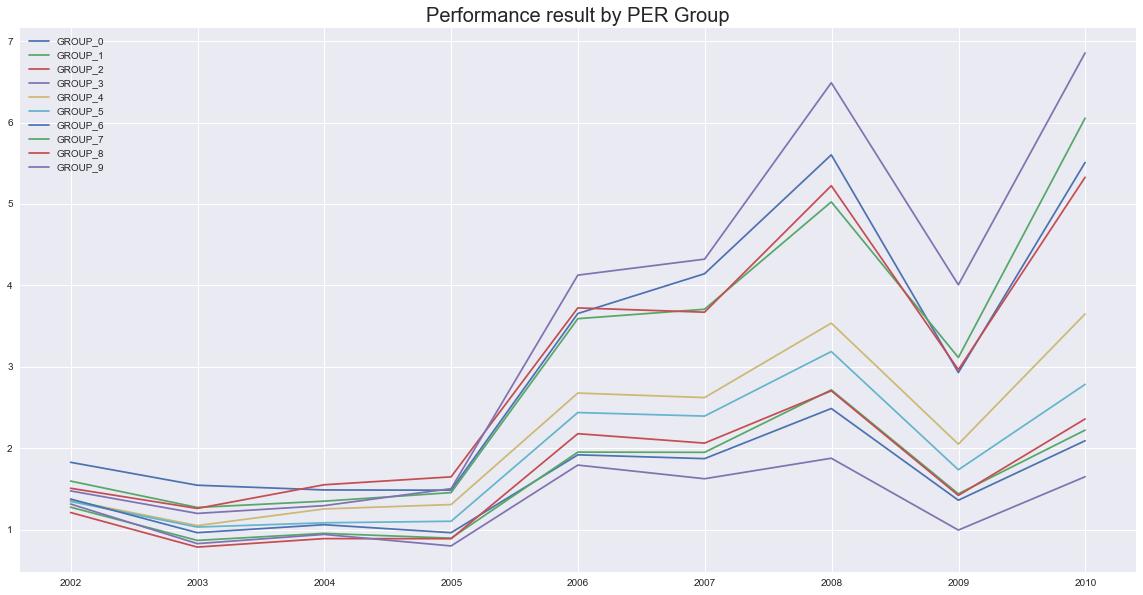

In [16]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[11:20].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

# 2010년대

Text(0.5,1,'Performance result by PER Group')

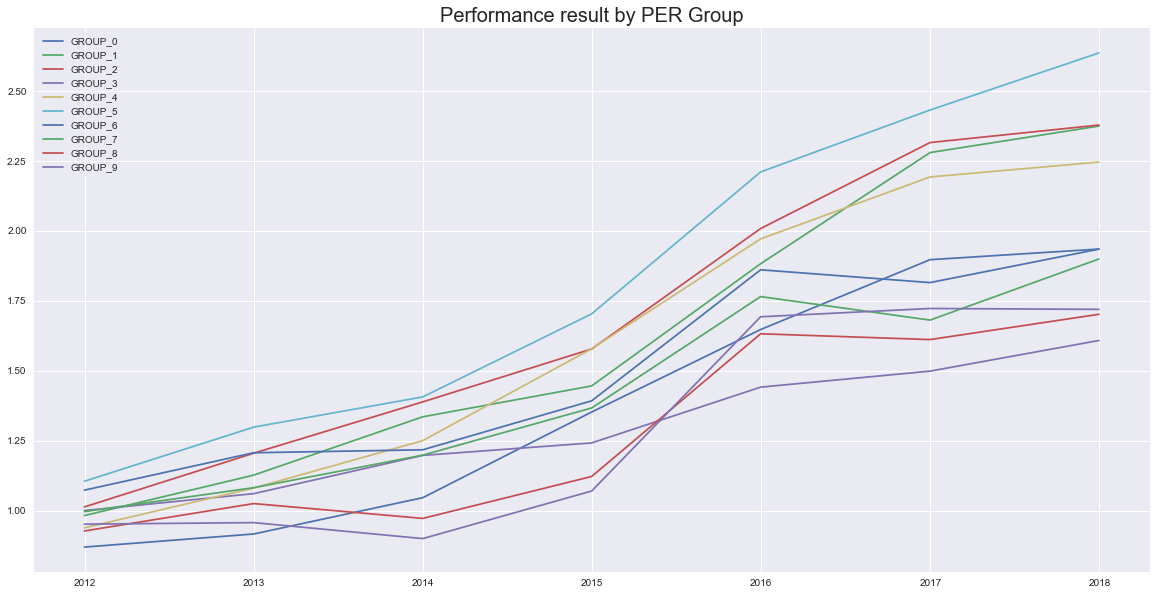

In [17]:
plt.figure(figsize = (20,10))

for column in result.columns:
    plt.plot(result[column].iloc[21:].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Performance result by PER Group')

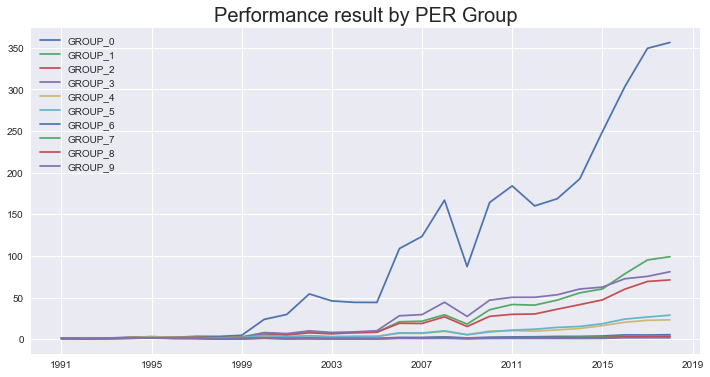

In [18]:
plt.figure(figsize = (12,6))

for column in result.columns:
    plt.plot(result[column].cumprod(), label = column)

plt.legend(loc = 'best')
plt.title('Performance result by PER Group', fontsize = 20)

Text(0.5,1,'Monthly return distribution by PER Group')

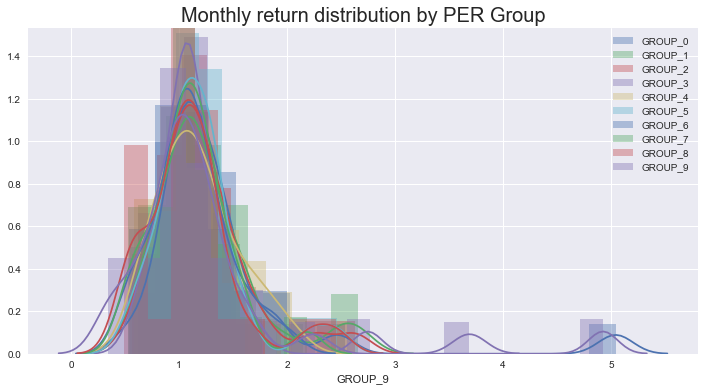

In [19]:
plt.figure(figsize = (12,6))

for column in result.columns:
    sns.distplot(result[column], label = column)

plt.legend(loc = 'best')
plt.title('Monthly return distribution by PER Group', fontsize = 20)

In [20]:
result.describe().apply(lambda x: round(x,3))

,GROUP_0,GROUP_1,GROUP_2,GROUP_3,GROUP_4,GROUP_5,GROUP_6,GROUP_7,GROUP_8,GROUP_9
count,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000,28.000
mean,1.361,1.252,1.231,1.295,1.174,1.187,1.116,1.104,1.117,1.146
std,0.816,0.478,0.445,0.814,0.370,0.410,0.348,0.353,0.447,0.636
min,0.523,0.620,0.567,0.618,0.580,0.544,0.533,0.529,0.489,0.343
25%,0.999,0.996,0.996,1.000,0.930,0.974,0.958,0.933,0.917,0.892
50%,1.147,1.151,1.144,1.076,1.132,1.103,1.087,1.104,1.081,1.012
75%,1.395,1.415,1.383,1.335,1.351,1.311,1.330,1.275,1.275,1.271
max,5.042,2.659,2.625,4.925,2.047,2.462,1.994,2.182,2.453,3.688
